# Singular Value Decomposition SVD

## Introdução

  A decomposição do valor singular (SVD - Singular Value Decomposition) transforma uma matriz $A$ qualquer com $m$ linhas e $n$ colunas em outras três matrizes $U, S, V^t$. O SVD tem grande importância na álgebra linear já que nos permite obter as informações mais importantes da matriz original.\
  A decomposição pode ser aplicada em diversas áreas como a redução de dimensões para compressão de imagens, para a desobstrução de imagens, para identificar ou otimizar problemas com lentes fora de foco, objetos em movimento, erros de medição, além de aplicações na área da medicina em ressonância magnética e tumografia computadorizada, sem contar os usos em outras ciências como a sismologia, cristalografia, ciência de materias, dentre muitas outras áreas.

### Método e algoritmo

 Seja $A_{mxn}$ a decomposição tem a seguinte forma:

 > $A = U S V^t$

 Onde:

> $U$ é uma matriz ortogonal $mxm$.\
 $S$ é uma matriz diagonal $mxn$.\
 $V$ é uma matriz ortogonal $nxn$.







- Para a matriz diagonal $S$ precisamos calcular os autovalores da matriz resultante do produto entre $A^t$ e $A$, ordena-los de forma decrescente e então adicionamos à diagonal da matriz $S$ a raiz quadrada de cada autovalor de $A^tA$.

- $V$ é composto pelos autovetores de $A^tA$, com mesma ordem dos autovetores correspondentes na ordenação anterior para encontrar a diagonal de $S$, onde os autovetores formam as colunas de $V$.

- Já $U$, é formado pelos autovetores da matriz resultante do produto entre $A$ e $A^t$, onde os autovetores formam as colunas de $U$.

Para os testes, aplicação final e para a implementação do algoritmo utilizaremos as seguintes bibliotecas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import time
import os
from scipy.io import mmread

%matplotlib inline

1. Para decompor a matriz A em $U$, $S$ e $V^t$, primeiro calculamos a matriz $W$ como sendo o resultado da multiplicação de $A^t$ e $A$.

2. Encontramos os autovalores e os autovetores de $W$.

3. Ordenamos cada dupla de autovalor e autovetor de forma que os autovalores fiquem ordenados de forma descrescente.

4. Obtém a diagonal de $S$ aplicando a raiz quadrada aos autovalores não nulos obtidos no passo anterior.

5. Cria uma matriz nula do mesmo tamanho de $A$ e adiciona a diagonal obtida no passo antecedente para formar a matriz diagonal $S.$

6. Cria a matriz $U$ com os autovetores do passo 2. e os adiciona a suas colunas.

7. Multiplica as matrizes $A$ e $A^T$ obtendo a matriz Z.

8. Calcula os autovetores de Z e adiciona as colunas de uma nova matriz $U$.

9. Retorna as matrizes $U$, $S$ e $V$.

In [ ]:
def SVD(A):
  '''
  Decompõe a matriz A nas matrizes U, S e V pelo método SVD.
  '''

  # Multiplicação de matriz entre a tranposta de A e A 
  W = np.matmul(A.T,A)

  # Encontra os autovalores e autovetores
  autovalores, autovetores = np.linalg.eig(W)

  #Ordenar de forma decrescente a tupla
  eig = list(zip(autovalores, autovetores.T))
  eig.sort(reverse=True)
  autovalores, autovetores = zip(*eig)

  autovalores = np.array(autovalores)
  autovetores = np.array(autovetores)

  # Calcula s (diagonal de S)
  s = np.sqrt(autovalores[ autovalores != 0 ])

  # Tamanho da matriz
  m, n = A.shape

  # Controi a matriz S
  S = np.zeros(m*n).reshape((m,n))

  for i, s_i in enumerate(list(s)):
    S[i][i] = s_i

  # Constroi a matriz V
  V = autovetores
  
  # Constroi a matriz U
  Z = np.dot(A, A.T)

  U = np.linalg.eig(Z)[1] # Autovetores de Z

  return U, S, V

Vamos ver uma de exemplo dtirada do livro Numerical Analysis. 

In [ ]:
exemplo_1 = [[1, 0, 1],
             [0, 1, 0],
             [0, 1, 1],
             [0, 1, 0],
             [1, 1, 0]]

SVD(np.array(exemplo_1))

(array([[-3.65148372e-01, -8.16496581e-01,  4.47213595e-01,
         -3.49560369e-01,  1.87089468e-16],
        [-3.65148372e-01,  4.08248290e-01,  4.47213595e-01,
         -7.90603305e-01, -4.69168020e-17],
        [-5.47722558e-01,  4.64375414e-16, -4.47213595e-01,
          3.49560369e-01,  7.07106781e-01],
        [-3.65148372e-01,  4.08248290e-01,  4.47213595e-01,
          9.14825670e-02, -2.39233303e-17],
        [-5.47722558e-01,  3.16056556e-16, -4.47213595e-01,
          3.49560369e-01, -7.07106781e-01]]),
 array([[2.23606798, 0.        , 0.        ],
        [0.        , 1.41421356, 0.        ],
        [0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]]),
 array([[-4.08248290e-01, -8.16496581e-01, -4.08248290e-01],
        [ 5.77350269e-01, -5.77350269e-01,  5.77350269e-01],
        [-7.07106781e-01,  5.42508101e-16,  7.07106781e-01]]))

## Casos teste

Para comprovar a validade do métodos foram escolhidas algumas matrizes para verificar sua eficácia. E as seguintes funções foram implementadas para ajudar na análise. A função Compara_matrizes_svd decompõe a matriz e retorna o tempo para da decomposição, e o erro que é a norma de Frobenius ($|||A|||_F$) da diferença entre a matriz usada para decomposição, e a multiplicação das três matrizes que o SVD retorna, dividido pela matriz usada na decomposição. Na segunda função, Plot_singular_values, é retornado dois gráficos, o primeiro apresenta o decaimento dos valores singulares (pois pelo SVD temos a diagonal de S com valores descrescentes) com escala logaritma no eixo y, e no segundo gráfico foi feita uma função acumulativa que mostra a porcentagem dos valores singulares a cada elemento da matriz. 

> Norma de Frobenius\
  $|||A|||_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n a_{ij}^2 }$

Logo, dada a matriz $A$ da imagem que queremos comprimir, e $A_{compressed}$ nossa matriz comprimida, temos o erro como sendo:

> Erro:\
  $erro = \frac{ |||A-A_{compressed}|||_F }{ |||A|||_F } $



In [ ]:
def Compara_matrizes_svd(A):

  '''
  Compara o tempo para encontrar os valores singulares, e a precisão ao multiplicar a matriz novamente.
  '''

  t0 = time.time()
  U, s, Vt = np.linalg.svd(A,full_matrices=False) # Decomposição
  t1 = time.time()

  m,n = A.shape

  S = np.diag(s)

  A_aprox = U @ S @ Vt

  # Calcula o desvio padrão da diferença das matrizes
  erro = np.linalg.norm(A - A_aprox, ord='fro')/np.linalg.norm(A, ord='fro')

  tempo = t1 - t0

  return tempo, erro, S


In [ ]:
def plot_singular_values(S):

  '''
  Plota dois gráficos da matriz dos valores singulares.
  '''

  diagonal = np.diag(S)

  plt.figure(figsize=[6.4*2,4.8])

  # Primeiro gráfico
  plt.subplot(1, 2, 1)
  plt.plot(diagonal)
  plt.title('Singular values')

  # symlog significa log simétrico e permite valores positivos e negativos.
  # permite definir um intervalo em torno de zero dentro do gráfico será linear em vez de logarítmico.
  plt.yscale('symlog')

  # Segundo gráfico
  plt.subplot(1, 2, 2)
  plt.plot(np.cumsum(diagonal)/np.sum(diagonal))
  plt.title('Singular values cumulative')


### Testes em matrizes diversas

#### Matriz qualquer

Tempo de execução: 0.001165628433227539 segundos 
Erro: 5.573333529428977e-14
Tamanho: 26x95


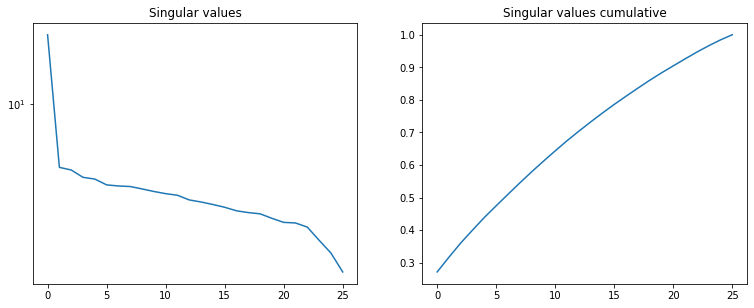

In [ ]:
# Gera uma matriz aleatória de tamanho aleatório
teste_0 = np.random.rand(np.random.randint(0,100), np.random.randint(0,100))

m,n = teste_0.shape

tempo, erro, S = Compara_matrizes_svd(teste_0)

print(f'Tempo de execução: {tempo} segundos \nErro: {erro}\nTamanho: {m}x{n}')

plot_singular_values(S)

Muitos dos métodos de decomposição de matrizes que vemos na álgebra linear tem como requisto que a matriz seja quadrada, mas o método SVD permite que decomponhamos uma matriz não quadrada, logo, nos permite resolver muitos outros problemas.

#### Simétrica positiva definida

Tempo de execução: 0.002082347869873047 segundos 
Erro: 1.3387839089730767e-12
Tamanho: 66x66


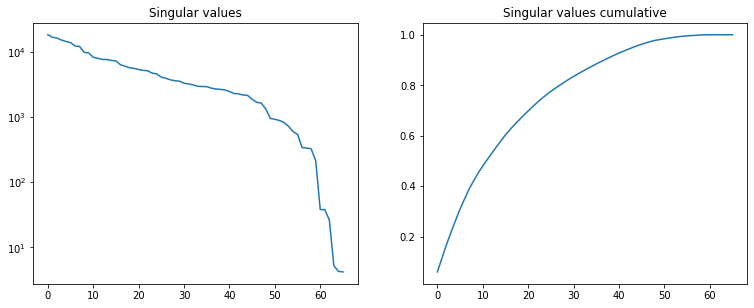

In [ ]:
#teste_1 = mmread('/content/drive/My Drive/Matrizes/Simetrica/PD/bcsstk02/bcsstk02.mtx').toarray()
teste_1 = mmread('/10349978_PF/Matrizes/bcsstk02.mtx').toarray()

m,n = teste_1.shape

tempo, erro, S = Compara_matrizes_svd(teste_1)

print(f'Tempo de execução: {tempo} segundos \nErro: {erro}\nTamanho: {m}x{n}')

plot_singular_values(S)


Para esta matriz temos os menores valores singulares após $k$ elementos, o que nos da espaço de um interpretação de que as informações mais importantes da matriz estão deles. 


#### Simétrica não positiva definida

Tempo de execução: 0.008505582809448242 segundos 
Erro: 1.3190319856480836e-10
Tamanho: 99x99


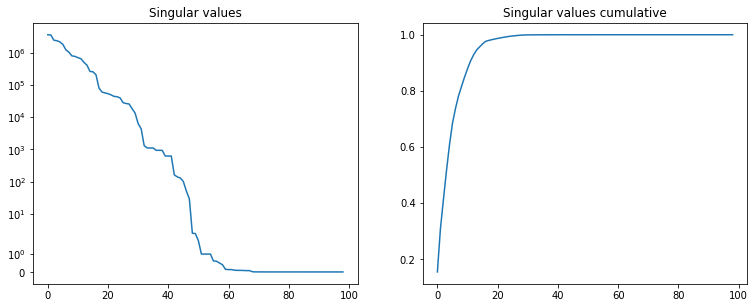

In [ ]:
#teste_2 = mmread('/content/drive/My Drive/Matrizes/Simetrica/NPD/spaceStation_1/spaceStation_1.mtx').toarray()
teste_2 = mmread('/10349978_PF/Matrizes/spaceStation_1.mtx').toarray()

m,n = teste_2.shape

tempo, erro, S = Compara_matrizes_svd(teste_2)

print(f'Tempo de execução: {tempo} segundos \nErro: {erro}\nTamanho: {m}x{n}')

plot_singular_values(S)

Para esta matriz simétrica, mas não positiva definida temos os maiores valores entre os primeiros 20 elementos da diagonal, e após do sexagésivo elemento da diagonal os elemento ficam bastante próximos de zero ou são zero, que nos mostra, assim como no gráfico acumulativo, que as características principais da matriz são baseadas nos primeiros valores singulares.


#### Retangular não positiva definida

Tempo de execução: 0.0007090568542480469 segundos 
Erro: 2.0036074715763755e-15
Tamanho: 27x51


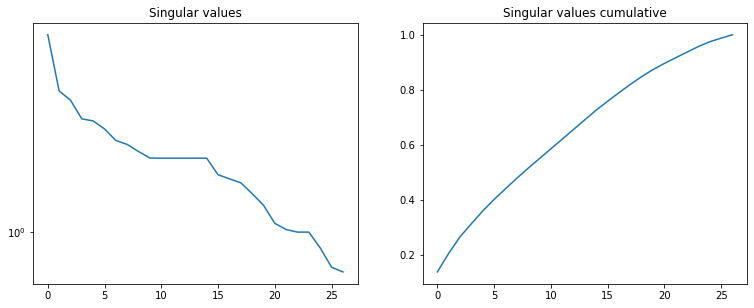

In [ ]:
#teste_3 = mmread('/content/drive/My Drive/Matrizes/Retangular_NSP/lp_afiro/lp_afiro.mtx').toarray()
teste_3 = mmread('/10349978_PF/Matrizes/lp_afiro.mtx').toarray()

m,n = teste_3.shape

tempo, erro, S = Compara_matrizes_svd(teste_3)

print(f'Tempo de execução: {tempo} segundos \nErro: {erro}\nTamanho: {m}x{n}')

plot_singular_values(S)

Neste exemplo de matriz retangular tem valores singulares com decaimento exponencial com menos quedas bruscas, mas mantem o padrão dos exemplos anteriores. E pelo gráfico acumulativo vemos que os valores singulares representam a matriz de forma próxima a linear.


#### Assimétrica não positiva definida

Tempo de execução: 0.0014073848724365234 segundos 
Erro: 8.505639734804795e-14
Tamanho: 66x66


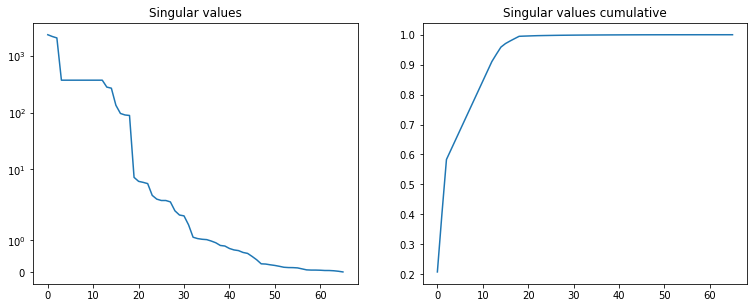

In [ ]:
#teste_4 = mmread('/content/drive/My Drive/Matrizes/Assimetrica_NPD/ww_36_pmec_36/ww_36_pmec_36.mtx').toarray()
teste_4 = mmread('/10349978_PF/Matrizes/ww_36_pmec_36.mtx').toarray()

m,n = teste_4.shape

tempo, erro, S = Compara_matrizes_svd(teste_4)

print(f'Tempo de execução: {tempo} segundos \nErro: {erro}\nTamanho: {m}x{n}')

plot_singular_values(S)

Mesmo com escala logaritmica, os valores singulares, pelo gráfico, tem algumas quedas basntante bruscas em relação aos anteriores, e no gráfico acumalado chega extremamente próximo a 100% por volta do $k=20$, o que no diz que boa parte das informações da matriz ficam até o $k=20$.

  Todos os exemplos de matrizes apresentadas acima tiverem um tempo de execução bastante bom e parecido apesar da diferença entra as matrizes, tanto em tamanho como em caracaterísticas.\
  A métrica utilizada para calcular o erro foi a norma de Frobenius, que nos retornou resultados muito próximos de zero, sendo muito menor que $10^{-10}$.

## Aplicação - Compactação de imagem (image compressiom)


Com o avanço da tecnologia foi possível que imagens com a mais alta resolução fossem tiradas inclusive à partir dos celulares mais comuns, além da facilidade de compartilhar essas imagens. Entretanto, com o aumento da qualidade das imagens o espaço necessário para armazena-las também aumentou significativamente, gerando um grande problema de armazenamento já que em diversas áreas em que é necessário ou interessante trabalhar com imagens de alta resolução precisaria de um grande espaço de armazenamento, assim, gerando um custo maior.

Uma grande aplicação para a deomposição SVD é o de compactação de imagem, já que com ela é possível reduzir o tamanho do arquivo e manter a qualidade da imagem. E vamos mostrar uma aplicação de SVD em compactação de imagem.


Foi escolhida uma imagem com alta resolução e 335.327 kb. 
Como para uma imagem colorida em RGB, sua representação matemática é uma matriz em que acada elemento é uma tripla ordenada (Red, Green e Blue), mas usaremos nosso método para matrizes que em cada elemento temos um valor real, então foi calculada a média dos três elementos e vamos tratar a imagem em uma escala de cinza, ou seja, preta e branca.

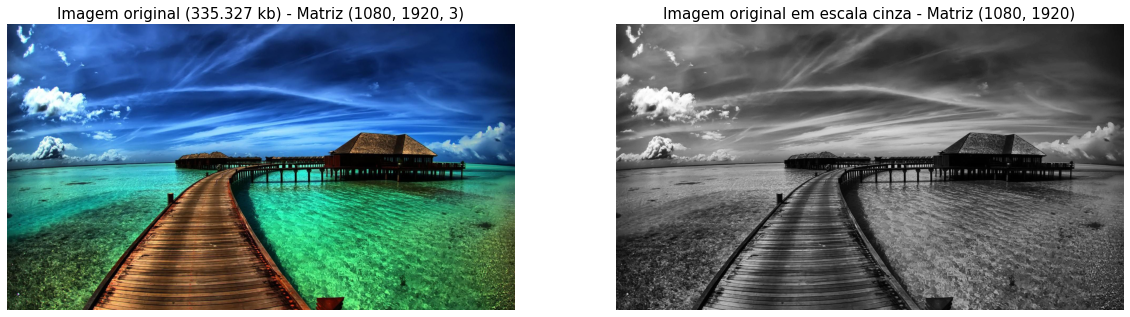

In [ ]:
#caminho_img = '/content/drive/My Drive/Matrizes/Praia.jpg'
caminho_img = '/10349978_PF/Matrizes/Praia.jpg'

A = plt.imread(caminho_img)

size_original = os.path.getsize(caminho)

plt.figure(figsize=[20,12])

plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title(f'Imagem original ({size_original/1000} kb) - Matriz {A.shape}',fontsize=15)
plt.axis('off')

# Transforma a imagem de RGB para a escala de uma cor apenas
A = np.mean(A, -1)

plt.subplot(1, 2, 2)
plt.imshow(A, cmap='gray')
plt.title(f'Imagem original em escala cinza - Matriz {A.shape}',fontsize=15)
plt.axis('off')

plt.show()

Vamos agora analisar os valores singulares da nossa imagem. 

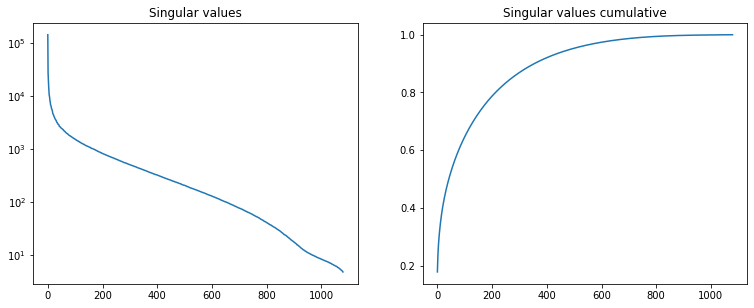

In [ ]:
# Passo da decomposição
U, s, Vt = np.linalg.svd(A)

S = np.diag(s)

# Gráficos dos valores singulares
plot_singular_values(S)

Temos então os valores singulares com um decaimento quase que exponencial, e no gráfico acumulado mostra um crescimento logaritmico que mostra um crescimento rápido e da a idéia de que ele atingiremos uma boa qualidade da imagem sem utilizar um posto tão alto.

Após fazer a decomposição, para obtermos uma aproximação $A_k$ para a representação da nossa imagem em uma matriz $A$, temos a possibilidade de encontrar as características mais importantes da nossa imagem.

Com,

>$A_k = U_k S_k V_k^t $

Onde $k$ é escolhido de forma que a parte da matriz S de com $k$ linha e $k$ colunas contém os valores singulares mais significantes.

Com o k escolhido, pegamos a matriz $U_k$ com suas todas suas linhas, apenas as k primeiras colunas, a matriz $V^t_k$ com suas k primeiras linhas e todas suas colunas, e a matriz $S_k$ com as primeiras k linhas e as primeiras k colunas, e então $A_k$ é a nossa aproximação para a imagem $A$.

Abaixo alguns testes variando o k.

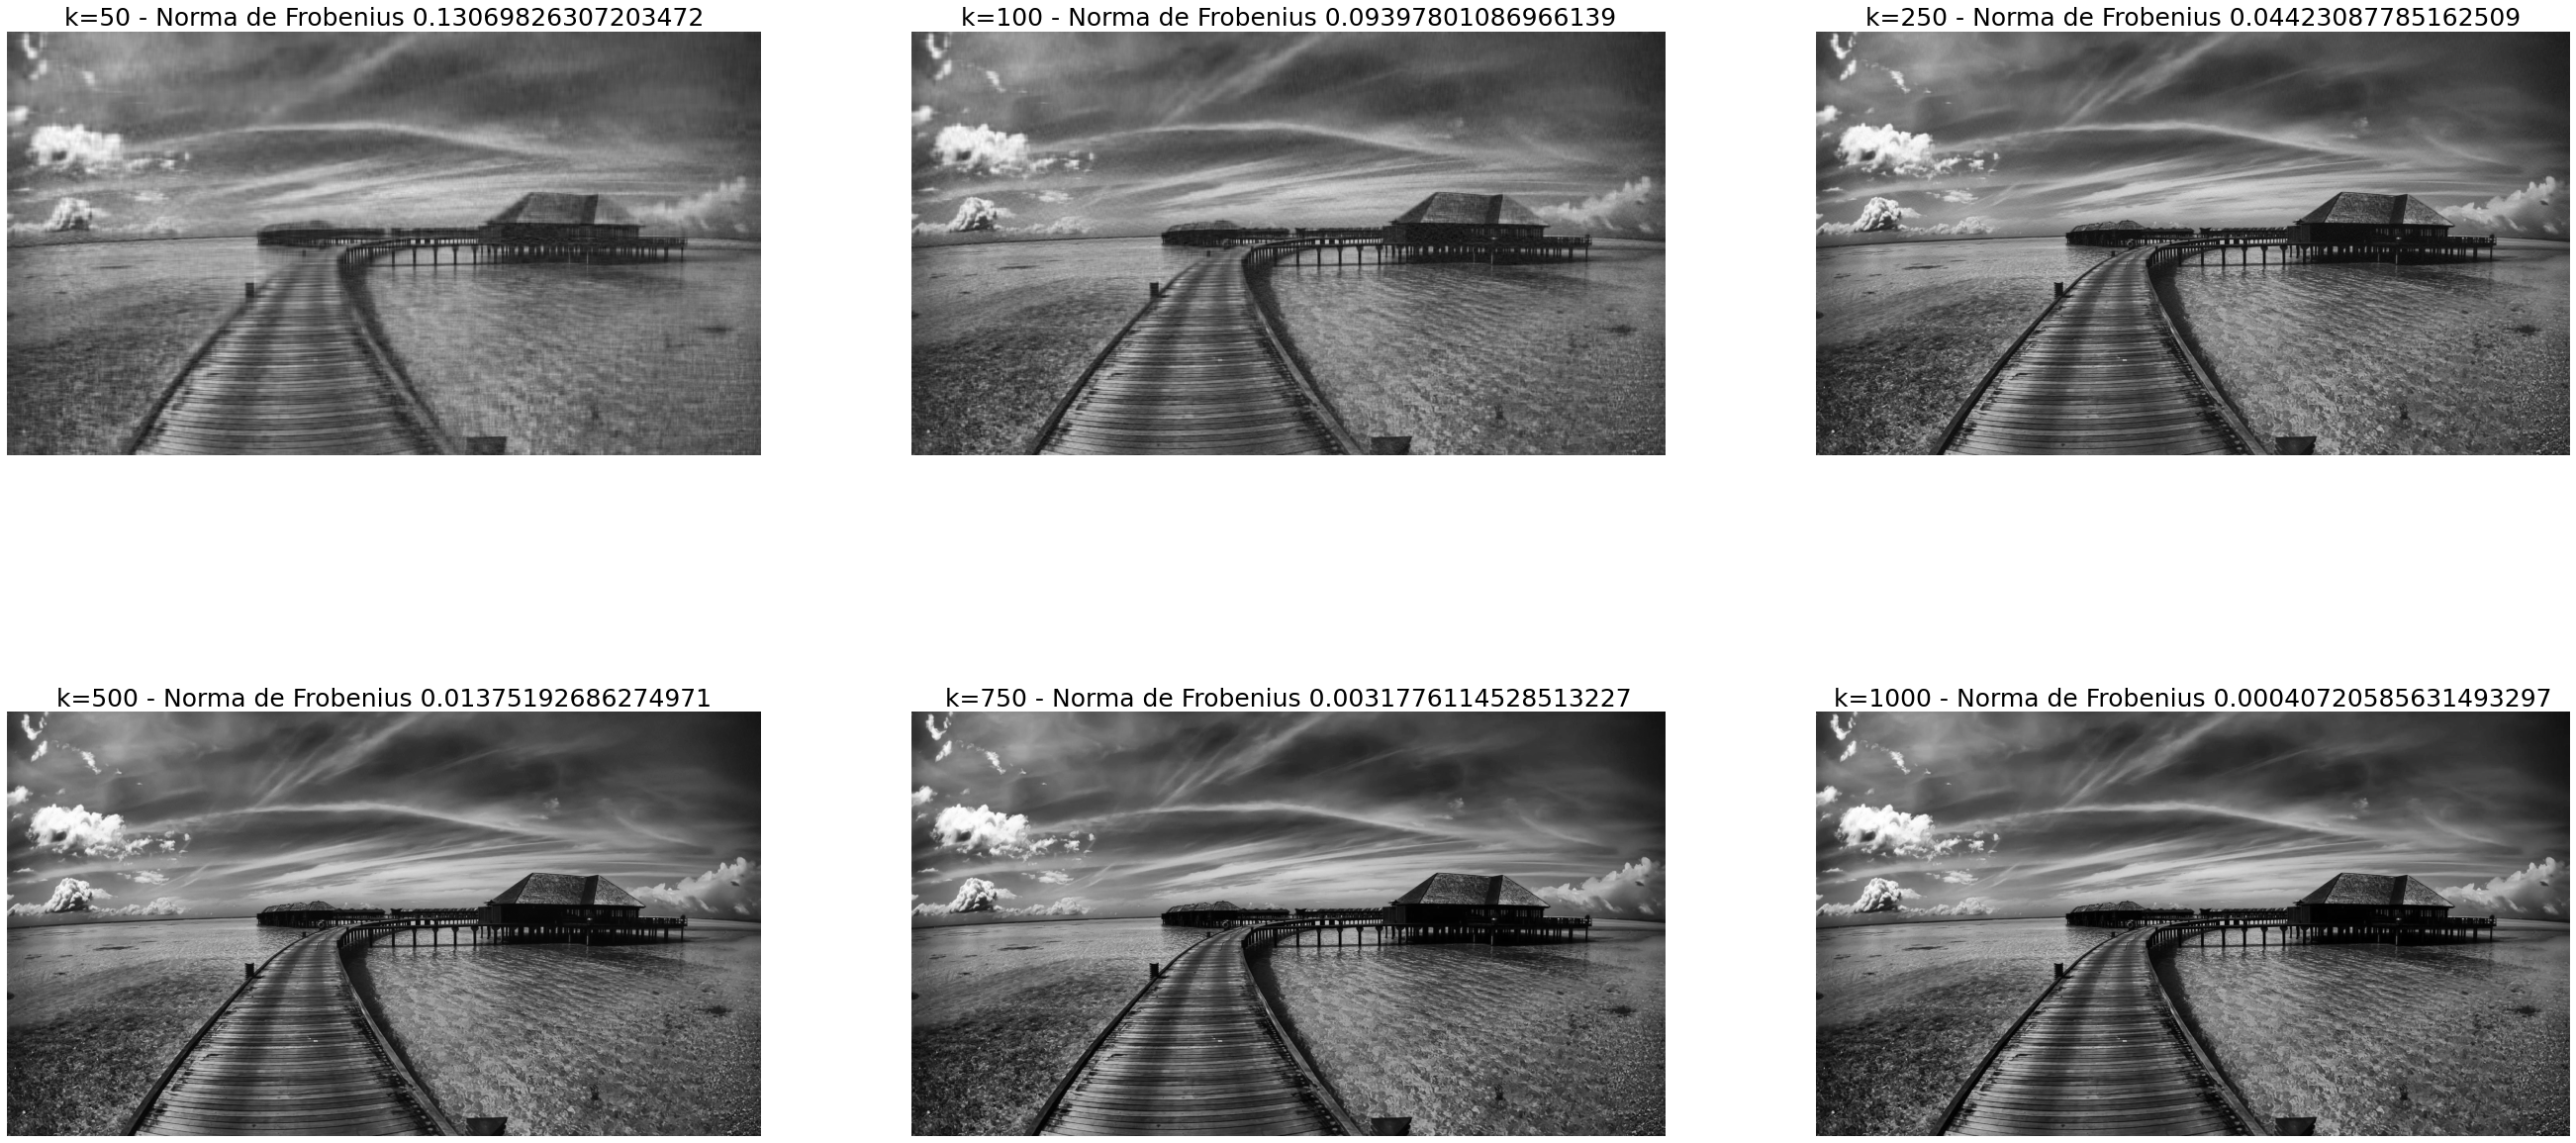

In [ ]:
m,n = A.shape

plt.figure(figsize=[2.9*16,2.9*8])

#Subplots tabela
for i, k in enumerate((50, 100, 250, 500, 750, 1000)):

  A_k = U[:,:k] @ S[:k,:k] @ Vt[:k,:]

  # Norma de Frobenius
  erro = np.linalg.norm(A - A_k, ord='fro')/np.linalg.norm(A, ord='fro')

  plt.subplot(2,3,i+1)
  plt.imshow(A_k, cmap='gray')
  plt.axis('off')
  plt.title(f'k={k} - Norma de Frobenius {erro}',fontsize=25)

Como esperado, a norma de Frobenius é menor quando comparamos a matriz $A$ e $A_k$ com o aumento de $k$.
E ao observarmos cada imagem, é visível a difença de qualidade quando comparadas, mas a partir de $k=100$ é decessário um rigor maior para notar um grande diferença de qualidade da imagem.

Agora, iremos comparar o espaço utilizado para armazenar cada imagem.

> A seguinte função salva 10 imagens com diferentes $k's$ e pega o tamanho do arquivo criado em kb.


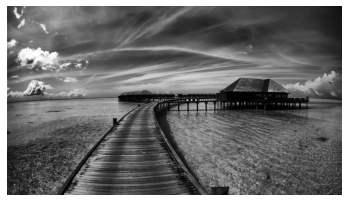

In [ ]:
# Tamanho do arquivo
size = np.zeros(10)
ks = np.zeros(10)

i = 0

for k in range(100,len(s),100):

  A_k = U[:,:k] @ S[:k,:k] @ Vt[:k,:]

  plt.imshow(A_k, cmap='gray')
  plt.axis('off')
  path = f'/10349978_PF/Imagens_teste/A_{k}.jpg'
  plt.savefig(path)

  # Eixo x do gráfico
  ks[i] = k

  # Tamanho do arquivo
  size[i] = os.path.getsize(path)
  i += 1




Vamos plotar um gráfico de linha para ajudar na vizualização da relação entre o aumento de k e o espaço necessário para armazenamento.

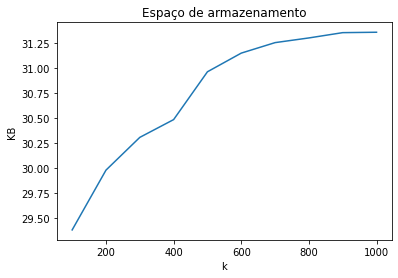

In [ ]:
plt.plot(ks,size/1000)
plt.ylabel('KB')
plt.xlabel('k')
plt.title('Espaço de armazenamento')
plt.show()

Podemos ver que o espaço necessario para armazenamento cresce conforme aumentamos o k, que nos mostra que a decomposição é realmente útil para reduzir o espaço de armazenamento de imagem, tendo apenas que escolher um $k$ suficientemente baixo para ocupar pouca memória, e suficientemente alto para que satisfaça as condições de qualidade de imagem para seus devidos fins. 
